In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
anime = pd.read_csv("anime.csv")
rating = pd.read_csv("rating.csv")

In [5]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [12]:
new_anime = anime.dropna(subset=["rating", "genre"])
len(new_anime)

12017

In [13]:
individual_genres = []

for i in range(len(new_anime["genre"])):
    try:
        word = new_anime["genre"].loc[i]
        #print(word)
    except:
        pass
    j = word.replace(".","").replace(" ","")
    new = j.split(",")
    individual_genres.append(new)

In [14]:
df = pd.DataFrame({"genre": individual_genres}, columns = ["genre"])

In [15]:
transform_df = df["genre"]
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
X = pd.DataFrame(mlb.fit_transform(transform_df),columns=mlb.classes_, index=df.index)

In [19]:
staged_anime = new_anime.drop(columns = ["genre"])

In [20]:
final_anime = pd.concat([staged_anime,X], axis = 1,join = "inner")

In [22]:
final_anime.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,9.25,114262,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,9.17,673572,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51,9.16,151266,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


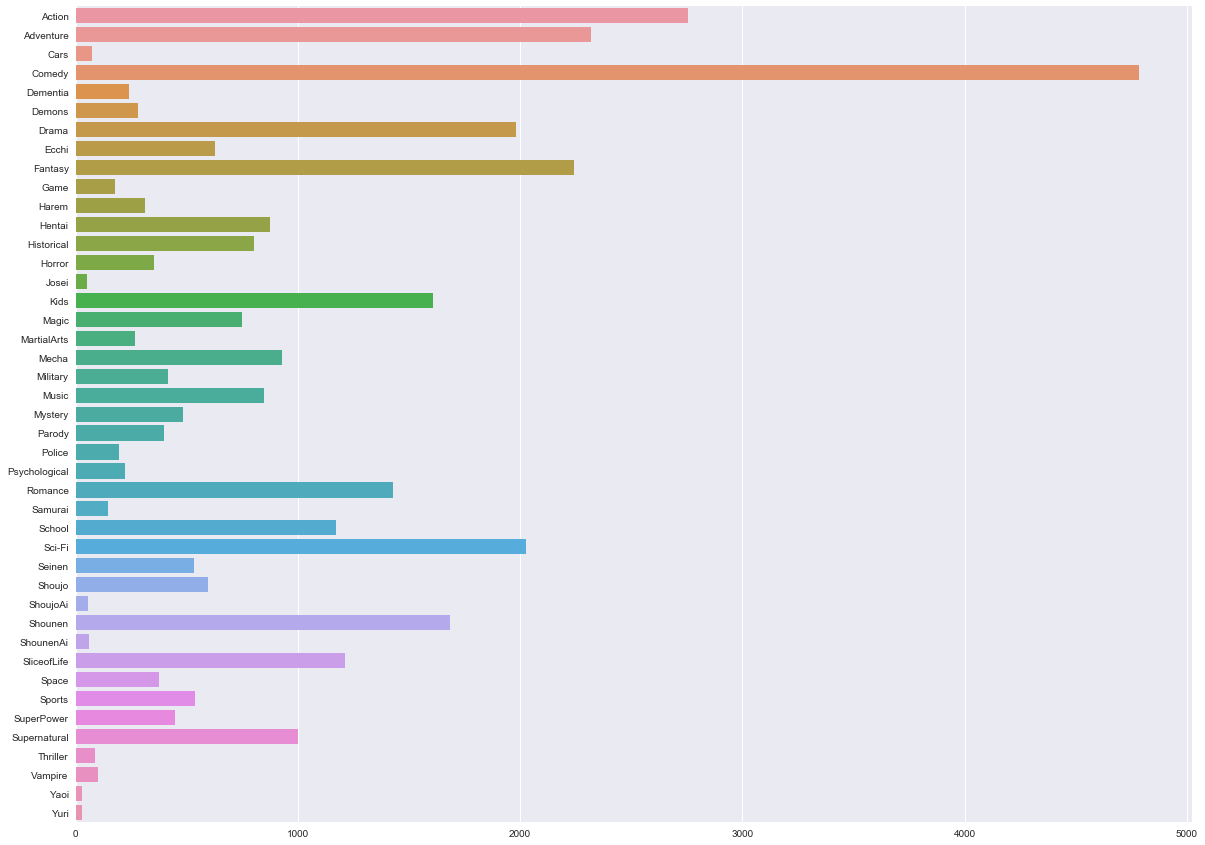

In [49]:
sns.barplot(y = X.columns,x = X.sum())
sns.set(rc={'figure.figsize':(20,15)})

C:\Users\Vineeth\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


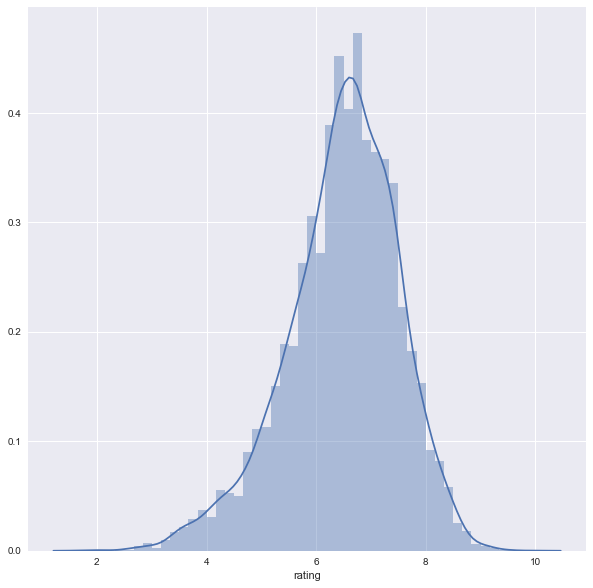

In [55]:
sns.distplot(new_anime.rating)
sns.set(rc={'figure.figsize':(5,5)})
